<a href="https://colab.research.google.com/github/eboateng/DRL-Final-Project/blob/main/DRL_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final DRL project (RL in Portfolio Management)**

## Loading libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 2.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# importing libaries:

# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modeling
import yfinance as yf # yahoo finance library
import datetime
import time
import requests
import io

## Preprocessing and loading the fund data

In [ ]:
# setting the time interval for which to pull historical share prices for (5 years)
start = datetime.datetime(2018,1,1) # format: year, month, day
end = datetime.datetime(2022,12,31)

In [ ]:
# creating a list of ticker/Isin symbols 

Symbols = ["VNRT.DE","VGEU.DE","VGEJ.DE","VJPN.DE","VFEM.DE","CSHD.L"] # ticker symbols of the Vanguard ETFs for the 5 regions + lyxor overnight return money market fund

In [ ]:
# Iterating over each stock symbol and download the daily stock prices between the start and end dates using the yahoo finance API

# create empty dataframe
price_hist_df = pd.DataFrame() 
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            price_hist_df = price_hist_df.append(stock,sort=False)
    except Exception:
        None

0 : VNRT.DE,1 : VGEU.DE,2 : VGEJ.DE,3 : VJPN.DE,4 : VFEM.DE,5 : CSHD.L,

In [ ]:
price_hist_df

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2018-01-02,56.020000,56.020000,55.070000,55.389999,55.389999,3629,VNRT.DE
2018-01-03,55.750000,55.860001,55.750000,55.860001,55.860001,350,VNRT.DE
2018-01-04,55.889999,55.970001,55.889999,55.950001,55.950001,107,VNRT.DE
2018-01-05,56.150002,56.380001,56.139999,56.380001,56.380001,375,VNRT.DE
2018-01-08,56.750000,56.799999,56.709999,56.799999,56.799999,383,VNRT.DE
...,...,...,...,...,...,...,...
2022-12-22,109.355003,109.355003,109.355003,109.235001,109.235001,2324,CSHD.L
2022-12-23,109.415001,109.415001,109.415001,109.415001,109.415001,0,CSHD.L
2022-12-28,109.900002,109.900002,109.544998,109.474998,109.474998,15,CSHD.L


In [ ]:
price_hist_df.shape

(7608, 7)

Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.

In [ ]:
price_hist_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,54.824990,54.981083,54.642839,54.811661,54.811661,13600.154048
std,34.378716,34.401261,34.357264,34.376286,34.376286,20820.649043
min,15.274000,15.624000,15.162000,15.330000,15.330000,0.000000
25%,27.055000,27.145000,26.955000,27.059999,27.059999,2118.500000
50%,37.932501,37.997499,37.867500,37.927500,37.927500,7124.500000
75%,70.602499,70.884998,70.482502,70.744999,70.744999,16812.500000
max,132.460007,132.690002,132.270004,132.449997,132.449997,341186.000000


In [ ]:
price_hist_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64

In [ ]:
price_hist_df = price_hist_df.drop(["Open","High","Low","Adj Close","Volume"],axis=1)

price_hist_df

,Close,Name
Date,,
2018-01-02,55.389999,VNRT.DE
2018-01-03,55.860001,VNRT.DE
2018-01-04,55.950001,VNRT.DE
2018-01-05,56.380001,VNRT.DE
2018-01-08,56.799999,VNRT.DE
...,...,...
2022-12-22,109.235001,CSHD.L
2022-12-23,109.415001,CSHD.L
2022-12-28,109.474998,CSHD.L


In [ ]:
# reshaping the dataframe
prices_reshaped_df = pd.pivot_table(price_hist_df, values ='Close', index =['Date'],columns =['Name']).reset_index().ffill(axis=0) # ffill: fill NaNs with preceding values

prices_reshaped_df = prices_reshaped_df.set_index("Date") # new index


prices_reshaped_df # 4years*252 trading days = 1008 days woth of price data

Name,CSHD.L,VFEM.DE,VGEJ.DE,VGEU.DE,VJPN.DE,VNRT.DE
Date,,,,,,
2018-01-02,126.599998,52.139999,23.094999,30.660000,26.629999,55.389999
2018-01-03,127.349998,52.889999,23.309999,30.850000,27.059999,55.860001
2018-01-04,127.849998,53.139999,23.309999,31.115000,27.315001,55.950001
2018-01-05,127.459999,53.590000,23.480000,31.385000,27.410000,56.380001
2018-01-08,126.879997,53.900002,23.480000,31.500000,27.764999,56.799999
...,...,...,...,...,...,...
2022-12-23,109.415001,49.805000,23.125000,33.025002,27.264999,87.610001
2022-12-27,109.415001,50.240002,23.205000,33.064999,27.115000,87.519997
2022-12-28,109.474998,49.980000,23.055000,32.939999,27.014999,87.040001


In [ ]:
prices_reshaped_df.isna().sum() # check for NaNs

Name
CSHD.L     0
VFEM.DE    0
VGEJ.DE    0
VGEU.DE    0
VJPN.DE    0
VNRT.DE    0
dtype: int64

In [ ]:
prices_reshaped_df.columns

Index(['CSHD.L', 'VFEM.DE', 'VGEJ.DE', 'VGEU.DE', 'VJPN.DE', 'VNRT.DE'], dtype='object', name='Name')

Text(0.5, 1.0, 'historical ETF share prices')

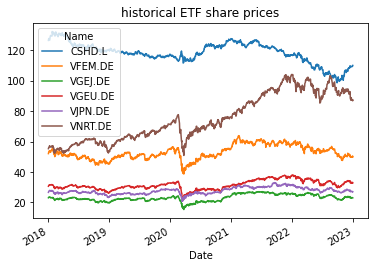

In [ ]:
prices_reshaped_df.plot()
plt.title("historical ETF share prices")

In [ ]:
prices_reshaped_df.to_csv("etf_history.csv") # saving the df to a csv file

In [ ]:
prices_reshaped_df.isnull().values.any() # mo missing data

False

In [ ]:
prices_reshaped_df.isnull().sum().sum()

0

In [ ]:
# missing data point -> thus 4 years instead of 5
yf.download('VGEU.DE',  
            start='2017-10-31', 
            end='2017-10-31', 
            progress=False
            )



1 Failed download:
- VGEU.DE: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Github repo zum 3 stock case blogpost
https://github.com/kvsnoufal/portfolio-optimization

Deep RL Tutorial for Portfolio Allocation

https://towardsdatascience.com/finrl-for-quantitative-finance-tutorial-for-portfolio-allocation-9b417660c7cd

FINRL library source: https://github.com/AI4Finance-Foundation/FinRL

In [ ]:
etf_hist_df = pd.read_csv("etf_history.csv").set_index("Date")

## normalise etf_hist_df with respect to its initial values. That way, value changes are being represented as a percentage
#etf_hist_df.iloc[:, :] = etf_hist_df.iloc[:, :] / etf_hist_df.iloc[0, :]

etf_hist_df

,CSHD.L,VFEM.DE,VGEJ.DE,VGEU.DE,VJPN.DE,VNRT.DE
Date,,,,,,
2018-01-02,126.599998,52.139999,23.094999,30.660000,26.629999,55.389999
2018-01-03,127.349998,52.889999,23.309999,30.850000,27.059999,55.860001
2018-01-04,127.849998,53.139999,23.309999,31.115000,27.315001,55.950001
2018-01-05,127.459999,53.590000,23.480000,31.385000,27.410000,56.380001
2018-01-08,126.879997,53.900002,23.480000,31.500000,27.764999,56.799999
...,...,...,...,...,...,...
2022-12-23,109.415001,49.805000,23.125000,33.025002,27.264999,87.610001
2022-12-27,109.415001,50.240002,23.205000,33.064999,27.115000,87.519997
2022-12-28,109.474998,49.980000,23.055000,32.939999,27.014999,87.040001


In [ ]:
# defining environment parameters
stock_dimension = etf_hist_df.shape[1] # no of columns

stock_dimension

6

## Building the environment

asset allocation env source: https://github.com/acbraith/gym-asset_allocation/blob/master/gym_asset_allocation/envs/asset_allocation_env.py

Custom environment to use

In [ ]:
import gym
from gym import spaces
from gym.utils import seeding

class Environment(gym.Env):
  def __init__(self, etf_hist_df, episode_length, observation_length):
    
    self.etf_hist_df = etf_hist_df
    self.episode_length = episode_length # number of days for training
    self.observation_length = observation_length # number of days being currently observed for next decision 

    self.n = etf_hist_df.shape[1] # number of assets
    #self.total_days_in_dataset = etf_hist_df.shape[0] # total number of days in dataset

    self.observation_space = spaces.Box(0, np.inf, shape=(self.n, self.observation_length)) # observation tensor: n assets being observed for xx days
    self.action_space = spaces.Box(0, 1, shape=(self.n,))
    
    self._seed()
    self._reset()

  def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

  def _rng(self, low, high):
    return np.random.randint(low=low, high=high)       

## 1 interaction step of the agent with the environment
  def _step(self, action):
       #assert self.action_space.contains(action), "%r (%s) invalid" % (action, type(action))

        if not self._get_over():
            self._take_action(action) # t is the day the asset allocation is chosen. t+1 is the day when the portfolio value has changed
            self.t += 1 # proceed to next day (time step)
        
        observation = self._get_observation()
        # update portfolio value
        reward = self._get_reward() 
        episode_over = self._get_over()
        info = {}

        
        return observation, reward, episode_over, info

## asset allocation: 6x1 array for weigths in time t
## portfolio value: PF value at time t       

  def _reset(self, episode_start=0, episode_end=30): ## reset environment (new initialization of the arrays)
    self.asset_allocation = np.zeros((self.episode_length, self.n)) # one row for each day. one column for each asset
    self.asset_allocation[:, 0] = 1 # initialise 100% of the money as cash (money market etf)
    
    self.episode_start = episode_start
    self.episode_end = episode_end
    self.t = 0 # current day within the episode. We start at day 0

    self.prices_df = etf_hist_df.iloc[episode_start:episode_end, :]

    self.portfolio_value = np.zeros((self.episode_length))
    #self.portfolio_value[0] = np.dot(self.asset_allocation[0], etf_hist_df.iloc[0,:])
    self.portfolio_value[0] = 1
    pass
  
  ## done flag
  def _get_over(self):
    return self.t+1 >= self.episode_length # false if another day for investment is still in episode

## normalize weight vector to length 1; 
  def _take_action(self, action):
    if action.sum() > 1:
      action /= action.sum() # normalise action ## /= action <- action/action.sum()
    
    # save asset allocation in array
    self.asset_allocation[self.t] = action

    # calculate profit over night
    # dot product of asset allocation with relative value change in asset
    self.portfolio_value[self.t+1] = self.portfolio_value[self.t] + np.dot(self.asset_allocation[self.t, :], (self.prices_df.iloc[self.t+1, :]
                                                                         - self.prices_df.iloc[self.t, :]) / self.prices_df.iloc[self.t, :])

    pass

## get current ETF share prices
  def _get_observation(self):
    return np.array([self.etf_hist_df.iloc[self.episode_start + self.t - self.observation_length : self.episode_start + self.t, :]]) 

## change in PF value
  def _get_reward(self):
    return (self.portfolio_value[self.t] - self.portfolio_value[self.t-1]) / self.portfolio_value[self.t-1]    



In [ ]:
number_of_episodes = 5
episode_length = 5
observation_length = 30
pf_env = Environment(etf_hist_df, episode_length, observation_length)



important code block

In [ ]:
## environment input parameters
number_of_episodes = 5
episode_length = 1285 # total number of days: 1285
observation_length = 30

## instantiation of the Environment class
pf_env = Environment(etf_hist_df, episode_length, observation_length)

env = pf_env

#observation : list = []
#reward : float = 0
#episode_over : bool = False
#info : dict = {}


def run_episode():
  #episode_start = env._rng(low = observation_length, high = etf_hist_df.shape[0] - episode_length) # determine start day within dataset
  episode_start = 0
  episode_end = episode_start + episode_length # determine end day with episode length
  env._reset(episode_start, episode_end)
  cumulative_reward = 0
  print("start at day: " + str(episode_start))
  for _ in range(episode_length):
    
    #action = np.ones(shape = 6)
    action = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]).astype(float) ## asset allocation weights / to test different weights
    observation, reward, episode_over, info = env._step(action)
    cumulative_reward += reward
    ##print(reward) ## debugging
    #print(action)
  print("cum. reward after step " + str(env.t) + ": " + str(cumulative_reward))
  print("final portfolio value: " + str(env.portfolio_value[env.t])) ## this is only a multiplier 



run_episode()



start at day: 0
cum. reward after step 1284: 0.17293744305697265
final portfolio value: 1.1359748306366118


FinRL API: https://finrl.readthedocs.io/en/latest/tutorial/Introduction/PortfolioAllocation.html

Multiple stock trading environment: https://finrl.readthedocs.io/en/latest/tutorial/Introduction/MultipleStockTrading.html

In [ ]:
##!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git
##!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

latest FinRL tutorial: https://medium.com/analytics-vidhya/a-hitchhikers-guide-to-finrl-a-deep-reinforcement-learning-framework-for-quantitative-finance-e624c508f763

## RL theory part about actor critic algorithms

Approximated policy gradient including the learned actor function and the learned critic function: (policy weight update)
$ \Delta_{\theta} = \alpha \nabla_{\theta} log \underbrace{\pi(s,a;\theta)}_{\text{policy function of the actor}} * \underbrace{Q(s,a;w)}_{\text{Q-function of the critic}} $

pseudo code of QAC (rough summary):


*   Initialize policy and Q-function weights $\theta$, w  
Repeat for each episode:  
*   sample action from policy $\pi$
*   take action a, observe r, s'
*   sample a' acc. to policy $\pi$(s',$\cdot$,$\theta$)
*   policy weight update theta 
*   Q-function weight update w 
*   a $\leftarrow$ a', s $\leftarrow$ s'  
until s is terminal



## Implement DRL algorithm

https://theaisummer.com/Actor_critics/

**Background (actor critic policy-based algorithms):**

**actor:** The actor takes as input the state and outputs the best action. It essentially controls how the agent behaves by learning the optimal policy

**critic:** The critic, on the other hand, evaluates the action by computing the value function (value based).   
The critic which receives as an input the environment and the action by the actor, concatenates them and outputs the action value (Q-value) for the given pair (Q-value = maximum future reward)

**training:** the actor NN and the critic NN are trained separately by gradient ascent (Compute steepest uphill direction = gradient;
Take step in the gradient direction
Repeat (until held-out data accuracy starts to drop = “early stopping”))

find a global maximum and update both the policy weights theta and the value function estimate weights w

It is important to notice that *the update of the weights happen at each step (TD Learning)* and not at the end of the episode, opposed to policy gradient

**Portfolio Mgt application case:** 

input for the actor: state = portfolio value;
ouput of the actor: best action = optimal asset allocation weights

input for the critic: portfolio weights from the actor + environment i.e. the prices of the 6 assets in the portfolio at the current time step
output of the critic: Q-value (s,a) for time t


**Advantage Actor critic:**   
the advantage function A(s,a) = Q(s,a) - V(s) <-> Q(s,a) = A(s,a)+V(s) captures how much better an action is compared to other actions in a given state s

the value function V(s) captures how good it is to be in particular state ("state value function")

**modification:** the critic learns advantage-values instead of Q-values. That way the evaluation of an action is based not only on how good the action is, but also how much better it can be.

## Actor Critic in Pytorch

In [ ]:
number_of_episodes = 5
episode_length = 30 # total number of days: 1285
observation_length = 3
episode_start = 50



NameError: ignored

In [ ]:
pf_env.observation_space.shape[1]

30

In [ ]:
pf_env.action_space ## passing a tuple leads to an error

Box(0.0, 1.0, (6,), float32)

In [ ]:
print(pf_env.reset()) ## issue

None


useful repos to base our model on:  
https://github.com/philtabor/Youtube-Code-Repository/blob/master/ReinforcementLearning/PolicyGradient/SAC/sac_torch.py

https://github.com/yc930401/Actor-Critic-pytorch/blob/master/Actor-Critic.py

https://github.com/kvsnoufal/portfolio-optimization/blob/main/train.py

A2C: https://github.com/mswang12/minA2C/blob/main/minA2C.py

In [ ]:
## Actor Critic RL model

import gym, os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## environment input parameters
number_of_episodes = 5
episode_length = 30 # total number of days: 1285
observation_length = 2


## inputs for the actor critic algorithm ##

env = pf_env  ## PF environment
##env = gym.make("CartPole-v0").unwrapped
##state_size = pf_env.observation_space.shape[1]
action_size = etf_hist_df.shape[1] # 6
state_size = observation_length * etf_hist_df.shape[1] ## 180 = 30*6

print(action_size), print(state_size) ## debugging
##rewards = pf_env.reward  ## to do: can't access _get_reward method from environment

## hyperparameters ##

n_iters = number_of_episodes ## no. of episodes
lr = 0.0001 ## learning rate


## actor learns the best action in a given state; input: state i.e. actor lears a policy (state-action mapping)
## theta: parametrized policy weights
class Actor(nn.Module): 
    def __init__(self, state_size, action_size):
        super(Actor, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear1 = nn.Linear(self.state_size, 256)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, self.action_size)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        output = self.linear3(output)
        distribution = Categorical(F.softmax(output, dim=-1))
        return distribution

## critic evaluates action by learning Q-value Q(s,a) or Advantage-value A(s,a) ; input: action (weights), environment (current prices)
## value function estimate weights w
class Critic(nn.Module): 
    def __init__(self, state_size, action_size):
        super(Critic, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear1 = nn.Linear(self.state_size, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 1)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        value = self.linear3(output)
        return value


def compute_returns(next_value, rewards, masks, gamma=0.99): ## to do: use rewards defined in the PF environment
    R = next_value
    returns = []
    for step in reversed(range(len(rewards))):
        R = rewards[step] + gamma * R * masks[step] ## masks?
        returns.insert(0, R)
    return returns

def prepare_state(state, input_shape):
  # this needs a numpy array as input to work
  state = torch.Tensor(state.astype(float))
  state = state.reshape([1, input_shape])
  return state



## AGENT ##
def trainIters(actor, critic, n_iters):
    optimizerA = optim.Adam(actor.parameters(), lr=lr) # optimization algorithm (ADAM) for the actor NN
    optimizerC = optim.Adam(critic.parameters(), lr=lr) # optimization algorithm (ADAM) for the critic NN
    for iter in range(n_iters):
        episode_start = env._rng(low = observation_length, high = etf_hist_df.shape[0] - episode_length) # determine start day within dataset
        #episode_start = 0
        episode_end = episode_start + episode_length # determine end day with episode length
        env._reset(episode_start, episode_end)
        
        #state = env._reset() ## here the current PF value (=state) should be inserted
        state = etf_hist_df.iloc[episode_start - observation_length : episode_start, :].to_numpy()
        state = prepare_state(state, state_size)

        log_probs = []
        values = []
        rewards = [] ## reward = change in PF value
        masks = []
        entropy = 0
        #env.reset()

## main loop
        for i in range(episode_length):
            ##env.render() ## not implemented
            print(state) ## debugging
            #state = torch.FloatTensor(state).to(device) ## state contains none object -> issue
            dist, value = actor(state), critic(state)

            action = dist.sample()
            next_state, reward, done, _ = env._step(action.cpu().numpy().astype(float)) ## rewards?
            next_state = prepare_state(next_state, state_size)

            log_prob = dist.log_prob(action).unsqueeze(0)
            entropy += dist.entropy().mean()

            log_probs.append(log_prob)
            values.append(value)
            rewards.append(torch.tensor([reward], dtype=torch.float, device=device))
            masks.append(torch.tensor([1-done], dtype=torch.float, device=device))

            state = next_state

            if done:
                print('Iteration: {}, Score: {}'.format(iter, i))
                break


        next_state = torch.FloatTensor(next_state).to(device)
        next_value = critic(next_state)
        returns = compute_returns(next_value, rewards, masks)

        log_probs = torch.cat(log_probs)
        returns = torch.cat(returns).detach()
        values = torch.cat(values)

        advantage = returns - values ## advantage function definition

        actor_loss = -(log_probs * advantage.detach()).mean()  ## actor loss to learn policy (policy gradient*Advantage estimate)
        critic_loss = advantage.pow(2).mean() ## critic loss to learn Q-value/Advantayge value (Advantage estimate)

        optimizerA.zero_grad()
        optimizerC.zero_grad()
        actor_loss.backward()
        critic_loss.backward()
        optimizerA.step()
        optimizerC.step()
    torch.save(actor, 'model/actor.pkl') ## saving the models to pickle
    torch.save(critic, 'model/critic.pkl')
    env.close()


if __name__ == '__main__':
    if os.path.exists('model/actor.pkl'):
        actor = torch.load('model/actor.pkl')
        print('Actor Model loaded')
    else:
        actor = Actor(state_size, action_size).to(device)
    if os.path.exists('model/critic.pkl'):
        critic = torch.load('model/critic.pkl')
        print('Critic Model loaded')
    else:
        critic = Critic(state_size, action_size).to(device)
    trainIters(actor, critic, n_iters=100)


6
12
tensor([[112.8650,  44.3150,  18.3640,  25.7700,  24.8200,  63.4300, 113.2450,
          45.0350,  18.7520,  26.2650,  25.2250,  65.0400]])


RuntimeError: ignored

In [ ]:
import argparse
import gym
import numpy as np
from itertools import count
from collections import namedtuple

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

## Environment ##
# Cart Pole

##parser = argparse.ArgumentParser(description='PyTorch actor-critic example')
##parser.add_argument('--gamma', type=float, default=0.99, metavar='G',
##                    help='discount factor (default: 0.99)')
##parser.add_argument('--seed', type=int, default=543, metavar='N',
##                    help='random seed (default: 543)')
##parser.add_argument('--render', action='store_true',
##                    help='render the environment')
##parser.add_argument('--log-interval', type=int, default=10, metavar='N',
##                    help='interval between training status logs (default: 10)')
##args = parser.parse_args()


##env = gym.make('CartPole-v1')
env = pf_env
##env.reset
##env.reset(seed=args.seed)
##torch.manual_seed(args.seed)


SavedAction = namedtuple('SavedAction', ['log_prob', 'value'])


class Policy(nn.Module):
    """
    implements both actor and critic in one model
    """
    def __init__(self):
        super(Policy, self).__init__()
        self.affine1 = nn.Linear(4, 128) # in: state representation, out: hidden layer

        # actor's layer
        self.action_head = nn.Linear(128, 2) # in: hidden layer, out: action probabilities

        # critic's layer
        self.value_head = nn.Linear(128, 1) # in: hidden layer, out: state value (v-value)

        # action & reward buffer
        self.saved_actions = []
        self.rewards = []

    def forward(self, x):
        """
        forward of both actor and critic
        """
        x = F.relu(self.affine1(x))

        # actor: choses action to take from state s_t
        # by returning probability of each action
        action_prob = F.softmax(self.action_head(x), dim=-1)

        # critic: evaluates being in the state s_t
        state_values = self.value_head(x)

        # return values for both actor and critic as a tuple of 2 values:
        # 1. a list with the probability of each action over the action space
        # 2. the value from state s_t ## Q-value
        return action_prob, state_values


model = Policy()
optimizer = optim.Adam(model.parameters(), lr=3e-2)
eps = np.finfo(np.float32).eps.item() ## epsilon greed exploration strategy


def select_action(state):
    state = torch.from_numpy(state).float()
    probs, state_value = model(state)

    # create a categorical distribution over the list of probabilities of actions
    m = Categorical(probs)

    # and sample an action using the distribution
    action = m.sample()

    # save to action buffer
    model.saved_actions.append(SavedAction(m.log_prob(action), state_value)) ## state_value = V-value

    # the action to take (left or right)
    return action.item()


def finish_episode():
    """
    Training code. Calculates actor and critic loss and performs backprop. Hallihallo :)
    """
    R = 0
    saved_actions = model.saved_actions
    policy_losses = [] # list to save actor (policy) loss
    value_losses = [] # list to save critic (value) loss
    returns = [] # list to save the true values

    # calculate the true value using rewards returned from the environment
    for r in model.rewards[::-1]:
        # calculate the discounted value
        R = r + args.gamma * R 
        returns.insert(0, R)

    returns = torch.tensor(returns)
    returns = (returns - returns.mean()) / (returns.std() + eps) 

    for (log_prob, value), R in zip(saved_actions, returns):
        advantage = R - value.item() ## advantage function (=Q-val - V-val)

        # calculate actor (policy) loss
        policy_losses.append(-log_prob * advantage) 

        # calculate critic (value) loss using L1 smooth loss
        value_losses.append(F.smooth_l1_loss(value, torch.tensor([R])))

    # reset gradients
    optimizer.zero_grad()

    # sum up all the values of policy_losses and value_losses
    loss = torch.stack(policy_losses).sum() + torch.stack(value_losses).sum()

    # perform backprop
    loss.backward()
    optimizer.step()

    # reset rewards and action buffer
    del model.rewards[:]
    del model.saved_actions[:]


def main():
    running_reward = 10

    # run infinitely many episodes
    for i_episode in count(1):

        # reset environment and episode reward
        state, _ = env.reset()
        ep_reward = 0

        # for each episode, only run 9999 steps so that we don't
        # infinite loop while learning
        for t in range(1, 10000):

            # select action from policy
            action = select_action(state)

            # take the action
            state, reward, done, _, _ = env.step(action)

            if args.render:
                env.render()

            model.rewards.append(reward)
            ep_reward += reward
            if done:
                break

        # update cumulative reward
        running_reward = 0.05 * ep_reward + (1 - 0.05) * running_reward

        # perform backprop
        finish_episode()

        # log results
        if i_episode % args.log_interval == 0:
            print('Episode {}\tLast reward: {:.2f}\tAverage reward: {:.2f}'.format(
                  i_episode, ep_reward, running_reward))

        # check if we have "solved" the cart pole problem
        if running_reward > env.spec.reward_threshold:
            print("Solved! Running reward is now {} and "
                  "the last episode runs to {} time steps!".format(running_reward, t))
            break


if __name__ == '__main__':
  main()

TypeError: ignored

## Performance evaluation

possible benchmarks:


*   Market cap
*   GDP weights
*   equal weight (regions, sectors)




possible metrics computed on the series of PF values (remember: reward = PF value)


*   Sharpe ratio (excess return/std of the PF Value)
*   Max drawdown (max decrease over the time frame considered)
*   PF volatility (sqrt of the estimated PF matrix of the single stock returns)



In [ ]:
## sharpe ratio (daily returns)
Sharpe_Ratio = portf_val[‘Daily Return’].mean() / portf_val[‘Daily Return’].std()

## annulalization
sharpe_ratio_pa = np.sqrt(252)*Sharpe_Ratio ## 252 trading days in a year



<ipython-input-43-669b19b380e7>:2: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe_ratio = env.portfolio_value[env.t].mean() / env.portfolio_value[env.t].std()


In [ ]:
prices_reshaped_df["VFEM.DE"].mean()/ prices_reshaped_df["VFEM.DE"].std()

11.46921908300366

In [ ]:
sharpe_ratio_pa_vfem = np.sqrt(252)*(prices_reshaped_df["VFEM.DE"].mean()/ prices_reshaped_df["VFEM.DE"].std())
sharpe_ratio_pa_vfem

182.06820855446372

In [ ]:
## PF volatility
##covariance = np.cov(returns.fillna(0).T) ## estimate covariance matrix of all positions in the PF (not the vola of the single positions)
portfolio = prices_reshaped_df
cov_mat = np.cov(prices_reshaped_df.fillna(0).T)

portfolio_volatility = np.sqrt(np.dot(np.dot(portfolio, cov_mat), portfolio.T))

portfolio_volatility, cov_mat

(array([[1249.01418621, 1254.64976743, 1256.81098351, ..., 1369.04541983,
         1373.99245141, 1369.97903453],
        [1254.64976743, 1260.31317804, 1262.48299109, ..., 1375.64149146,
         1380.61437752, 1376.57578049],
        [1256.81098351, 1262.48299109, 1264.65727116, ..., 1377.77172058,
         1382.75125229, 1378.70947752],
        ...,
        [1369.04541983, 1375.64149146, 1377.77172058, ..., 1580.66618971,
         1586.73112023, 1581.06633382],
        [1373.99245141, 1380.61437752, 1382.75125229, ..., 1586.73112023,
         1592.82081981, 1587.12995381],
        [1369.97903453, 1376.57578049, 1378.70947752, ..., 1581.06633382,
         1587.12995381, 1581.47203451]]),
 array([[ 46.68316438,   5.03987474,   0.86086247,  -2.26186488,
           0.5674584 , -51.12199898],
        [  5.03987474,  21.28677935,   9.63294745,  11.69484284,
           8.88454935,  49.37580102],
        [  0.86086247,   9.63294745,   4.95374502,   6.11765673,
           4.24507282,  25.102

Actor Critic Algorithm (Pytorch)

source: https://github.com/pytorch/examples/blob/main/reinforcement_learning/actor_critic.py

Pytorch actor critic algo applied to PF Mgt: https://github.com/MatthieuSarkis/Portfolio-Optimization-and-Goal-Based-Investment-with-Reinforcement-Learning/blob/master/src/main.py

Gym is an open source Python library for developing and comparing reinforcement learning algorithms by providing a standard API to communicate between learning algorithms and environments, as well as a standard set of environments compliant with that API. Since its release, Gym's API has become the field standard for doing this.

## Appendix (Backup)

Matthieu Sarkis backup implementation: https://github.com/MatthieuSarkis/Portfolio-Optimization-and-Goal-Based-Investment-with-Reinforcement-Learning/tree/master/src

In [ ]:
## preprocessing way 2 ##

# Perform Feature Engineering:
df = FeatureEngineer(price_hist_df.copy(),
                    use_technical_indicator=True,
                    use_turbulence=False).preprocess_data()


# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  covs = return_lookback.cov().values 
  cov_list.append(covs)
  
df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)
df.head() 

NameError: ignored

In [ ]:
class EnvSetup:
    """
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
        ----------
        stock_dim: int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount: int
            start money
        transaction_cost_pct : float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        tech_indicator_list: list
            a list of technical indicator names (modified from config.py)
    Methods
        -------
        create_env_training()
            create env class for training
        create_env_validation()
            create env class for validation
        create_env_trading()
            create env class for trading
    """

In [ ]:
# Initialize env:
env_setup = EnvSetup(stock_dim = stock_dimension,
                        state_space = state_space,
                        initial_amount = 10000,
                        ##tech_indicator_list = config.TECHNICAL_INDICATORS_LIST
                     )
                        
env_train = env_setup.create_env_training(data = train,
                                          env_class = StockPortfolioEnv)   

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym
    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date
    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then 
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step
        
    """
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
        # Shape = (34, 30)
        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=0, 
                                            high=np.inf, 
                                            shape = (self.state_space+len(self.tech_indicator_list),
                                                     self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs),
                      [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]

        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            #print(actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            weights = norm_actions 
            #print(weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value 
            #self.reward = self.reward*self.reward_scaling


        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False 
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]] 
        return self.state
    
    def render(self, mode='human'):
        return self.state
    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

In [ ]:
own_pf_env = StockPortfolioEnv(df=etf_hist_df,
                               stock_dim=etf_hist_df.shape[1],
                               hmax= etf_hist_df.shape[1],
                               initial_amount=10000,
                               transaction_cost_pct=0.01,
                               reward_scaling=1,
                               state_space=1285,
                               action_space=6, # stock dimension
                               tech_indicator_list=[],
                               turbulence_threshold=100000,
                               day=1 # increment number of days
                               )

KeyError: ignored

In [ ]:
!pip install quandl

In [ ]:
# Asset allocation environment
import gym
from gym import error, spaces, utils
from gym.utils import seeding

import numpy as np
import pandas as pd
import quandl
import errno
import os
import pickle
import datetime

class AssetAllocationEnv(gym.Env):
    # # # # # # # # # # # # # # # # # # # #
    # Overridden methods
    # # # # # # # # # # # # # # # # # # # #
    def __init__(self):
        # prices is a T x n array
        # first indexed by time, then by asset
        self.cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        self._pull_price_data()
        n = len(self.asset_price_dfs)

        self.observation_space = spaces.Box(0, np.finfo('d').max, shape=(n, 5))
        self.action_space = spaces.Box(0, 1, shape=(n))

        self._seed()
        self._reset()

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def _step(self, action):
        assert self.action_space.contains(action), "%r (%s) invalid" % (action, type(action))

        if not self._get_over():
            self.t += 1
            self._take_action(action)

        observation = self._get_observation()
        reward = self._get_reward()
        episode_over = self._get_over()
        info = {}

        return observation, reward, episode_over, info

    def _reset(self):

        # self.price is a dict, keys 'Open','High','Low','Close','Volume'
        self.price = self._get_price_data()

        self.T = self.price['Open'].shape[0] # final time
        self.n = self.price['Open'].shape[1] # number of assets

        # These are all for the START of day t
        self.allocation = np.zeros((self.T, self.n)) # fund allocation
        self.holdings = np.zeros((self.T, self.n)) # asset holdings
        self.cash = np.zeros((self.T))
        self.cash[0] = 100

        self.value = np.zeros((self.T)) # total value
        self.value[0] = np.dot(self.holdings[0], self.price['Open'][0]) + self.cash[0]

        self.t = 0 # current time


    def _render(self, mode='human', close=False):
        # TODO
        pass

    # # # # # # # # # # # # # # # # # # # #
    # Helper methods
    # # # # # # # # # # # # # # # # # # # #
    def _pull_price_data(self):
        # cache data for 1 day (because API calls limited to daily cap)
        directory = 'data/'
        filename = 'price_data.pkl'
        assets = ['TSE/9994', 'TSE/3443']
        try:
            with open(directory+filename, 'rb') as f:
                timestamp, self.asset_price_dfs = pickle.load(f)
                if datetime.datetime.now().date() != timestamp.date():
                    raise FileNotFoundError(
                        errno.ENOENT, os.strerror(errno.ENOENT), directory+filename)
        except FileNotFoundError:
            if not os.path.exists(directory):
                os.makedirs(directory)
            self.asset_price_dfs = []
            for asset in assets:
                self.asset_price_dfs += [quandl.get(asset)]

            with open(directory+filename, 'wb') as f:
                pickle.dump((datetime.datetime.now(), self.asset_price_dfs), f)

    def _get_price_data(self, days=252):
        self.np_random.shuffle(self.asset_price_dfs)

        # get slices of length days from each dataframe
        asset_df_slices = []
        for asset_df in self.asset_price_dfs:
            if len(asset_df) > days:
                i_start = self.np_random.randint(0, len(asset_df)-days)
                asset_df_slice = asset_df.iloc[i_start:i_start+days]
                asset_df_slices += [asset_df_slice]

        # stack these together in to prices
        prices = {}
        for col in self.cols:
            prices[col] = np.column_stack([df[col] for df in asset_df_slices])

        return prices

    def _take_action(self, action):
        # Normalise action
        if action.sum() > 1:
            action /= action.sum()

        # update current allocation, value and holdings
        self.allocation[self.t] = action

        # keep holdings[t-1] from t-1 to t
        self.value[self.t] = np.dot(self.holdings[self.t-1], self.price['Open'][self.t]) + \
            self.cash[self.t-1]

        # calculate our new holdings
        self.holdings[self.t] = self.value[self.t] * self.allocation[self.t] / \
            self.price['Open'][self.t]
        self.cash[self.t] = (1-action.sum()) * self.value[self.t]

    def _get_observation(self):
        return np.array([self.price[col][self.t] for col in self.cols]).transpose()

    def _get_reward(self):
        return (self.value[self.t] - self.value[self.t-1]) / self.value[self.t-1]

    def _get_over(self):
        return self.t+1 >= self.T

In [ ]:
AssetAllocationEnv(,)